In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
# 1. 加载并处理图片
imgPath = '/home/liy/CQU_EIE/dataEngineer/digitReco/template.png'
image = cv2.imread(imgPath, cv2.IMREAD_GRAYSCALE)
blurred = cv2.GaussianBlur(image, (5, 5), 0)
edges = cv2.Canny(blurred, 50, 150)

In [3]:
# 2. 找到最大轮廓并裁剪网格区域
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
x, y, w, h = cv2.boundingRect(max(contours, key=cv2.contourArea))
cropped_grid = image[y:y+h, x:x+w]

In [4]:
# 3. 显示裁剪后的网格
plt.imshow(cropped_grid, cmap='gray')
plt.title("Cropped Grid")
# plt.show()
plt.close() # 不显示图像

In [5]:
# 4. 分割网格
grid_rows, grid_cols = 44, 27  # 网格是 44x27
cell_height, cell_width = cropped_grid.shape[0] // grid_rows+1, cropped_grid.shape[1] // grid_cols

cells = [
    cropped_grid[row*cell_height:(row+1)*cell_height, col*cell_width:(col+1)*cell_width]
    for row in range(grid_rows) for col in range(grid_cols)
]

In [6]:
# 5. 可视化每个方格（可选）
for i, cell in enumerate(cells):
    plt.imshow(cell, cmap='gray')
    plt.title(f"Cell {i}")
plt.close() # 不显示图像

In [7]:
print(f"分割后的方格数量: {len(cells)}")

分割后的方格数量: 1188


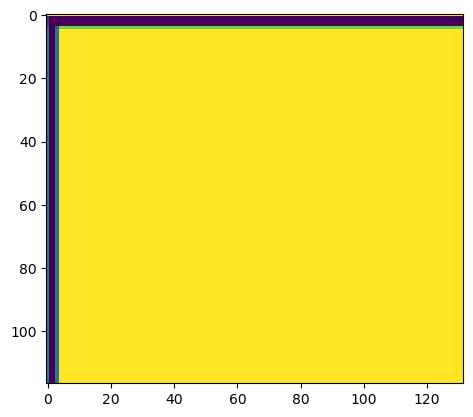

In [12]:
plt.imshow(cells[0])